<a href="https://colab.research.google.com/github/fwx5ax/Final-Project-DS3001/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project - GSS

1. What is in your data?

Our data is composed of GSS survey data and includes several variables relating to demographic, economic, social, and health-related information of the participants, as well as data on job satisfaction, political views, family dynamics, and more. The data includes both categorical (e.g., marital status, race, political views) and numerical (e.g., income, stress level) variables. For a more specific breakdown of our exact variables, see below:

1. Demographic Variables:
	•	marital: Marital status of the respondent (e.g., married, divorced, never married).
	•	divorce: Whether the respondent has experienced a divorce.
	•	childsinhh: Whether the respondent has children living in the household.
	•	childs: Number of children the respondent has.
	•	hompop_exp: Expected household population.
	•	rspgndr: Respondent’s gender.
	•	educ: Highest level of education attained by the respondent.
	•	degree: Type of degree held (e.g., high school, college).
	•	paeduc: Father's education level.
	•	maeduc: Mother's education level.
	•	wrkstat: Respondent's current work status (e.g., employed, unemployed, retired).
	•	race, raceacs1, raceacs2, raceacs3, raceacs16: Respondent's race or ethnicity and detailed race categories.
	•	sex: Gender of the respondent.
	•	sexornt: Sexual orientation of the respondent.
	•	age: age of the respondent
2. Economic Variables:
	•	sei: Socioeconomic index (measure of occupational status).
	•	realrinc, realinc: Real income or household income adjusted for inflation.
	•	rincome: Any income from occupation?
	•	class: Social class of the respondent.
3. Family and Household:
	•	babies, preteen, teens, adults: Number of individuals in various age groups within the household.
	•	partners: Number of sexual partners the respondent had in the past year.
4. Health-Related Variables:
	•	health: Respondent's self-reported health status.
	•	stress: Level of stress reported by the respondent.
	•	neisafe: Safety perceived in the neighborhood.
	•	physact: Physical activity levels.
	•	smokeday: Whether the respondent smokes daily.
5. Social and Political Views:
	•	polviews: Political views of the respondent (e.g., liberal, conservative).
	•	relig: Religious affiliation.
	•	pray: Frequency of prayer.
	•	attend: Frequency of religious service attendance.
	•	postlife: Beliefs regarding life after death.
	•	fear: Fears related to safety or societal issues.
	•	gunlaw: Opinion on gun laws.
	•	trust: Level of trust in government, people, etc.
6. Job and Work-Related Variables:
	•	joblose: Whether the respondent has lost a job.
	•	jobfind: Whether the respondent found a job after losing one.
	•	spwrksta: Work status of spouse/partner.
	•	cowrksta: Work status of coworkers.
	•	satjob: Job satisfaction (e.g., very satisfied, somewhat satisfied).
7. Well-being and Happiness:
	•	happy: Respondent's overall happiness.
	•	hapmar: Happiness in marriage.
	•	hapcohab: Happiness in cohabitation.
	•	satfin: Satisfaction with financial situation.
8. Safety and Security:
	•	vaxsafe: Perception of vaccine safety.
	•	covid12: Opinion or impact of COVID-19.
	•	evidu: Perception of educational or social issues.
	•	helpful: Perception of helpfulness in society or community.
	•	arrest: Whether the respondent has been arrested.
9. Other Variables:
	•	instype01: Type of health insurance.
	•	condom: Use of contraception, specifically condoms.
	•	jobfind: Whether the respondent was able to find a job after losing one.
10. Subjective Well-Being:
	•	happy: Overall happiness.
	•	hapmar: Happiness in marriage.
	•	hapcohab: Happiness in cohabitation.


2. How will these data be useful for studying the phenomenon you're interested in?

These variables from the GSS data allow our group to understand how social structures, personal well-being, cultural beliefs, and economic conditions interact with one another to shape the state of the world, particularly in the context of current global political and social dynamics, which is the phenomenon we are most interested in. By examining the relationships between various aspects of demographics, economic factors, and emotional well-being, our group is aiming to uncover how societal issues like job insecurity, income inequality, and family life impact overall happiness and stress levels. Furthermore, by examining variables related to political and religious views, our group wants to explore how these factors shape perceptions of trust, safety, and societal issues. We seek to understand how political polarization and the social divisions currently evident in our country may be reflected in this data. Overall, we want to examine the ways in which this data reflects broader social science concerns about inequality, societal well-being, and the evolving nature of family and work life. By analyzing these interactions, we can identify trends that inform better decision-making for policymakers and social scientists, as understanding how different factors influence well-being and societal outcomes allows for more targeted interventions and strategies that can promote a more equitable and less polarized society.

3. What are the challenges you've resolved or expect to face in using them?
Although the dataset appears relatively clean, there is always the issue of data completeness due to some variables being missing, inconsistent, or incomplete. Handling these missing values (NaNs), especially when they are spread across different columns, can require decisions about whether to impute values or just completely drop rows. Data standardization might also be necessary, as variables like political views/religious beliefs/income may be recorded in different formats or categories across time. Another challenge we are expecting to face is multicollinearity, where certain variables may be highly correlated with each other, which could lead to a lot of unnecessary overlap in our analysis and repetition of extracting trends from certain patterns. We could avoid this by dropping particular variables that represent the same thing. The last challenge we expect to face has to do with our interpretation of the interactions between certain variables as some of these relationships might be non-linear and complicated to visually understand what they are saying about the broader picture. As such, we should be very careful in how we read graphs and interpret the trends of the interactions between variables in order to most effectively understand how different factors interact.

In [701]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [702]:
var_list = ['marital', 'divorce', 'childsinhh', 'childs','age', 'hompop_exp','rspgndr', 'rprnt18',
'educ', 'degree', 'paeduc', 'maeduc', 'wrkstat','hrs1', 'sei', 'realrinc', 'realinc', 'rincome',
'babies','preteen','teens','adults','race', 'raceacs1', 'raceacs2', 'raceacs3',
'raceacs16','racecen1', 'sex', 'sexornt','vaxsafe','covid12','happy','hapmar','hapcohab', 'satfin',
'health', 'stress', 'neisafe','physact', 'instype01', 'partners', 'condom', 'evidu',
 'smokeday', 'arrest', 'trust', 'helpful','joblose', 'jobfind', 'spwrksta', 'cowrksta', 'class',
'polviews', 'relig', 'pray', 'attend', 'postlife', 'fear','gunlaw', 'satjob'] # List of variables you want to save

output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    if phase == 0:
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode


In [703]:
gss = pd.read_csv('selected_gss_data.csv')

<ipython-input-703-9e26a9569f66>:1: DtypeWarning: Columns (6,7,23,24,25,26,27,29,30,31,34,37,38,39,40,41,42,43,44,45,51) have mixed types. Specify dtype option on import or set low_memory=False.
  gss = pd.read_csv('selected_gss_data.csv')


In [704]:
gss.head()

,marital,divorce,childsinhh,childs,age,hompop_exp,rspgndr,rprnt18,educ,degree,...,cowrksta,class,polviews,relig,pray,attend,postlife,fear,gunlaw,satjob
0,never married,NaN,NaN,0.0,23.0,NaN,NaN,NaN,16.0,bachelor's,...,NaN,middle class,NaN,jewish,NaN,about once or twice a year,NaN,NaN,favor,a little dissatisfied
1,married,no,NaN,5.0,70.0,NaN,NaN,NaN,10.0,less than high school,...,NaN,middle class,NaN,catholic,NaN,every week,NaN,NaN,favor,NaN
2,married,no,NaN,4.0,48.0,NaN,NaN,NaN,12.0,high school,...,NaN,working class,NaN,protestant,NaN,about once a month,NaN,NaN,favor,moderately satisfied
3,married,no,NaN,0.0,27.0,NaN,NaN,NaN,17.0,bachelor's,...,NaN,middle class,NaN,other,NaN,never,NaN,NaN,favor,very satisfied
4,married,no,NaN,2.0,61.0,NaN,NaN,NaN,12.0,high school,...,NaN,working class,NaN,protestant,NaN,never,NaN,NaN,favor,NaN


In [705]:
gss['degree'].unique()

array(["bachelor's", 'less than high school', 'high school', 'graduate',
       'associate/junior college', nan], dtype=object)

In [706]:
gss[['educ','paeduc','maeduc']].describe()

,educ,paeduc,maeduc
count,72127.000000,51529.000000,60605.000000
mean,13.034633,10.905296,11.034024
std,3.182372,4.330440,3.763997
min,0.000000,0.000000,0.000000
25%,12.000000,8.000000,8.000000
50%,12.000000,12.000000,12.000000
75%,16.000000,13.000000,12.000000
max,20.000000,20.000000,20.000000


In [707]:
gss[['realrinc','realinc','sei']].describe()

,realrinc,realinc,sei
count,42333.000000,64912.000000,31277.000000
mean,23064.143938,32537.399981,48.423570
std,29175.569814,30883.226094,19.183154
min,218.000000,218.000000,17.100000
25%,8308.000000,12080.625000,32.400000
50%,16604.500000,24139.000000,39.000000
75%,28156.500000,40756.500000,63.500000
max,480144.472857,162607.000000,97.200000


In [708]:
print(gss['rincome'].unique())
print(gss['class'].unique())
gss = gss.drop(columns='rincome')
# we do not need another measure of occupation income - total income will be fine

[nan '$1,000 to $2,999' '$15,000 to $19,999' '$7,000 to $7,999'
 '$8,000 to $9,999' '$20,000 to $24,999' '$4,000 to $4,999'
 '$10,000 to $14,999' '$25,000 or more' '$3,000 to $3,999' 'under $1,000'
 '$5,000 to $5,999' '$6,000 to $6,999']
['middle class' 'working class' 'upper class' 'lower class' nan 'no class']


In [709]:
gss[['babies','preteen','teens','adults','childs','childsinhh']].describe()

,babies,preteen,teens,adults,childs,childsinhh
count,66210.000000,66181.000000,66269.000000,68289.000000,72129.000000,1768.000000
mean,0.223954,0.275094,0.211698,1.913690,1.916538,0.464932
std,0.564219,0.652489,0.553078,0.812289,1.759511,0.982537
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
max,6.000000,8.000000,8.000000,9.000000,8.000000,8.000000


In [710]:
print(gss['hompop_exp'].describe())
# total # of people in household
gss = gss.drop(columns='hompop_exp')

print(gss['rspgndr'].unique())
# how the home/childcare labor is divided by gender

print(gss['rprnt18'].unique())
# are u the parent of another child 18 or older in your household?
gss = gss.drop(columns='rprnt18')

count    3538.000000
mean        1.678067
std         1.269275
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: hompop_exp, dtype: float64
[nan 'women and men take equal responsibility'
 'men take much more responsibility'
 'men take somewhat more responsibility'
 'women take somewhat more responsibility'
 'women take much more responsibility']
[nan 'yes' 'no']


In [711]:
print(gss['racecen1'].unique())
print(gss['race'].unique())

[nan 'white' 'black or african american' 'hispanic' 'other asian' 'samoan'
 'filipino' 'american indian or alaska native' 'other pacific islander'
 'chinese' 'some other race' 'vietnamese' 'asian indian' 'japanese'
 'korean' 'native hawaiian' 'guamanian or chamorro']
['white' 'black' 'other' nan]


In [712]:
gss = gss.drop(columns=['raceacs1', 'raceacs2', 'raceacs3','raceacs16'])
# these race dummy variables are not needed and can be created by us if we want them

In [713]:
print(gss['sex'].unique())
print(gss['sexornt'].unique())

['female' 'male' nan]
[nan 'heterosexual or straight' 'gay, lesbian, or homosexual' 'bisexual']


In [714]:
print(gss['divorce'].unique())
print(gss['marital'].unique())
print(gss['hapmar'].unique())
print(gss['hapcohab'].unique())
print(gss['partners'].describe())

[nan 'no' 'yes']
['never married' 'married' 'divorced' 'widowed' 'separated' nan]
[nan 'very happy' 'pretty happy' 'not too happy']
[nan 'very happy' 'pretty happy' 'not too happy']
count         37672
unique           10
top       1 partner
freq          24059
Name: partners, dtype: object


In [715]:
print(gss['happy'].unique())
print(gss['satfin'].unique())
print(gss['health'].unique())
print(gss['stress'].unique())
print(gss['physact'].unique())

['not too happy' 'pretty happy' 'very happy' nan]
['not satisfied at all' 'more or less satisfied' 'pretty well satisfied'
 nan]
['good' 'fair' 'excellent' 'poor' nan]
[nan 'sometimes' 'often' 'hardly ever' 'never' 'always']
[nan 'once a month or less often' 'several times a month'
 'several times a week' 'daily' 'never']


In [716]:
print(gss['wrkstat'].unique())
print(gss['joblose'].unique())
print(gss['jobfind'].unique())
print(gss['spwrksta'].unique())
print(gss['cowrksta'].unique())
print(gss['satjob'].unique())
print(gss['hrs1'].describe())

['working full time' 'retired' 'working part time' 'keeping house'
 'in school' 'unemployed, laid off, looking for work'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'other' nan]
[nan 'not likely' 'not too likely' 'very likely' 'fairly likely'
 'leaving labor force']
[nan 'not easy' 'very easy' 'somewhat easy']
[nan 'keeping house' 'working full time'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'working part time' 'retired' 'unemployed, laid off, looking for work'
 'in school' 'other']
[nan 'working full time' 'keeping house' 'retired'
 'unemployed, laid off, looking for work' 'in school' 'working part time'
 'other'
 'with a job, but not at work because of temporary illness, vacation, strike']
['a little dissatisfied' nan 'moderately satisfied' 'very satisfied'
 'very dissatisfied']
count    41560.000000
mean        41.183951
std         14.125299
min          0.000000
25%         37.000000
50%         40.000000
75% 

In [717]:
print(gss['evidu'].describe())
print(gss['smokeday'].describe())
print(gss['arrest'].describe())

count     23790
unique        2
top          no
freq      23077
Name: evidu, dtype: object
count                           1128
unique                             7
top       do not smoke and never did
freq                             665
Name: smokeday, dtype: object
count     12342
unique        3
top          no
freq      10781
Name: arrest, dtype: object


In [718]:
print(gss['vaxsafe'].describe())
print(gss['covid12'].describe())
print(gss['instype01'].describe())
print(gss['condom'].describe())

count      1232
unique        5
top       agree
freq        430
Name: vaxsafe, dtype: object
count     1226
unique       2
top        yes
freq       999
Name: covid12, dtype: object
count                         981
unique                          5
top       public health insurance
freq                          363
Name: instype01, dtype: object
count        27537
unique           2
top       not used
freq         21606
Name: condom, dtype: object


In [719]:
gss = gss.drop(columns=['helpful','trust'])
# not necessarily interesting

In [720]:
print(gss['pray'].describe())
print(gss['attend'].describe())
print(gss['relig'].describe())
print(gss['postlife'].describe())

count          43269
unique             6
top       once a day
freq           12083
Name: pray, dtype: object
count     71690
unique        9
top       never
freq      13855
Name: attend, dtype: object
count          71953
unique            13
top       protestant
freq           40125
Name: relig, dtype: object
count     44148
unique        2
top         yes
freq      35337
Name: postlife, dtype: object


In [721]:
print(gss['neisafe'].describe())
print(gss['fear'].describe())
print(gss['gunlaw'].describe())
print(gss['polviews'].describe())

count          6646
unique            4
top       very safe
freq           3464
Name: neisafe, dtype: object
count     45781
unique        2
top          no
freq      27793
Name: fear, dtype: object
count     48307
unique        2
top       favor
freq      36367
Name: gunlaw, dtype: object
count                            62718
unique                               7
top       moderate, middle of the road
freq                             23992
Name: polviews, dtype: object


In [722]:
# Rename columns in the GSS for clarity
gss = gss.rename(columns={
    'childsinhh': 'children_in_household',
    'childs': 'number_of_children',
    'rspgndr': 'gender_housework',
    'paeduc': 'father_educ',
    'maeduc': 'mother_educ',
    'wrkstat': 'work_status',
    'hrs1': 'hours_worked',
    'realrinc': 'real_income',
    'realinc': 'household_income',
    'race': 'race_ethnicity',
    'racecen1': 'race_detailed',
    'vaxsafe': 'vaccine_safety',
    'covid12': 'covid19_impact',
    'hapmar': 'marriage_happiness',
    'hapcohab': 'cohab_happiness',
    'satfin': 'financial_satis',
    'neisafe': 'neighborhood_safety',
    'instype01': 'health_insurance',
    'partners': 'number_partners',
    'evidu': 'inj_drugs',
    'spwrksta': 'spouse_work_status',
    'cowrksta': 'cohab_work_status',
    'postlife': 'beliefs_afterlife',
    'fear': 'area_fear',
    'satjob': 'job_satisfaction'
})


In [723]:
gss.head()

,marital,divorce,children_in_household,number_of_children,age,gender_housework,educ,degree,father_educ,mother_educ,...,cohab_work_status,class,polviews,relig,pray,attend,beliefs_afterlife,area_fear,gunlaw,job_satisfaction
0,never married,NaN,NaN,0.0,23.0,NaN,16.0,bachelor's,10.0,NaN,...,NaN,middle class,NaN,jewish,NaN,about once or twice a year,NaN,NaN,favor,a little dissatisfied
1,married,no,NaN,5.0,70.0,NaN,10.0,less than high school,8.0,8.0,...,NaN,middle class,NaN,catholic,NaN,every week,NaN,NaN,favor,NaN
2,married,no,NaN,4.0,48.0,NaN,12.0,high school,8.0,8.0,...,NaN,working class,NaN,protestant,NaN,about once a month,NaN,NaN,favor,moderately satisfied
3,married,no,NaN,0.0,27.0,NaN,17.0,bachelor's,16.0,12.0,...,NaN,middle class,NaN,other,NaN,never,NaN,NaN,favor,very satisfied
4,married,no,NaN,2.0,61.0,NaN,12.0,high school,8.0,8.0,...,NaN,working class,NaN,protestant,NaN,never,NaN,NaN,favor,NaN


In [724]:
numeric_columns = gss.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_columns)

Numeric columns: Index(['children_in_household', 'number_of_children', 'age', 'educ',
       'father_educ', 'mother_educ', 'hours_worked', 'sei', 'real_income',
       'household_income', 'babies', 'preteen', 'teens', 'adults'],
      dtype='object')


In [725]:
categorical_columns = gss.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['marital', 'divorce', 'gender_housework', 'degree', 'work_status',
       'race_ethnicity', 'race_detailed', 'sex', 'sexornt', 'vaccine_safety',
       'covid19_impact', 'happy', 'marriage_happiness', 'cohab_happiness',
       'financial_satis', 'health', 'stress', 'neighborhood_safety', 'physact',
       'health_insurance', 'number_partners', 'condom', 'inj_drugs',
       'smokeday', 'arrest', 'joblose', 'jobfind', 'spouse_work_status',
       'cohab_work_status', 'class', 'polviews', 'relig', 'pray', 'attend',
       'beliefs_afterlife', 'area_fear', 'gunlaw', 'job_satisfaction'],
      dtype='object')


In [726]:
# 1. Impute numeric columns with the mean
numeric_columns = gss.select_dtypes(include=['number']).columns
for col in numeric_columns:
    gss[col] = gss[col].fillna(gss[col].mean())

# 2. Impute categorical columns with the string "missing"
categorical_columns = gss.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    gss[col] = gss[col].fillna('missing')


After exploring the variables, here is a final list of the variables in the dataset. We dropped some variables and renamed many for clarity.

'marital', 'divorce', 'children_in_household', 'number_of_children', 'gender', 'educ', 'age',
 'degree', 'father_educ', 'mother_educ', 'work_status', 'hours_worked', 'sei', 'real_income',
 'household_income', 'babies', 'preteen', 'teens', 'adults', 'race_ethnicity', 'race_detailed',
 'sex', 'sexornt', 'vaccine_safety', 'covid19_impact', 'happy', 'marriage_happiness',
 'cohab_happiness', 'financial_satis', 'health', 'stress', 'neighborhood_safety', 'physact',
 'health_insurance', 'number_partners', 'condom', 'inj_drugs', 'smokeday', 'arrest', 'joblose',
 'jobfind', 'spouse_work_status', 'cohab_work_status', 'class', 'polviews', 'relig', 'pray', 'attend',
 'beliefs_afterlife', 'area_fear', 'gunlaw', 'job_satisfaction'

# Visualizations

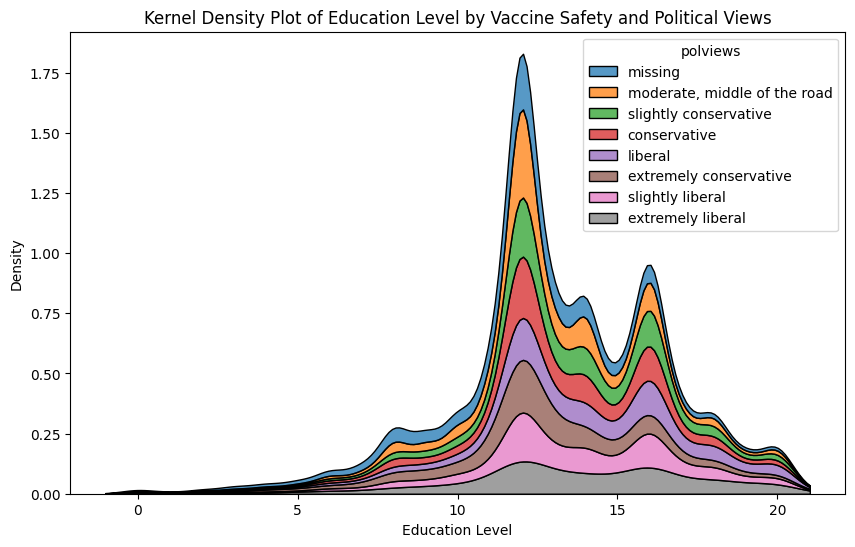

In [727]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'vaccine_safety' and 'beliefs_afterlife' and plotting the kernel density
plt.figure(figsize=(10, 6))
#sns.kdeplot(data=gss, x="educ", hue="vaccine_safety", multiple="stack", common_norm=False)
sns.kdeplot(data=gss, x="educ", hue="polviews", multiple="stack", common_norm=False)

plt.title('Kernel Density Plot of Education Level by Vaccine Safety and Political Views')
plt.xlabel('Education Level')
plt.ylabel('Density')
plt.show()

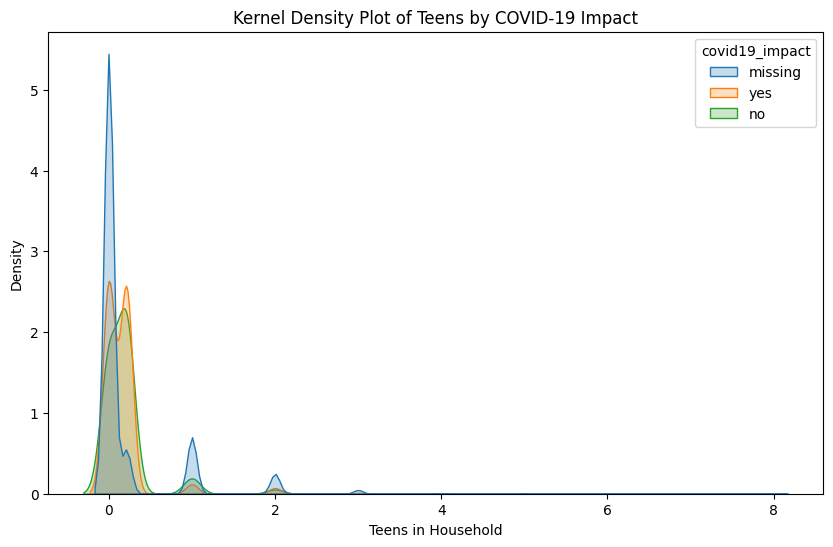

In [728]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=gss, x='teens', hue='covid19_impact', common_norm=False, fill=True)
plt.title('Kernel Density Plot of Teens by COVID-19 Impact')
plt.xlabel('Teens in Household')
plt.ylabel('Density')
plt.show()

<ipython-input-729-88aae307d70b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_filtered['log_real_income'] = np.log1p(gss_filtered['real_income'])  # Log-transform real income


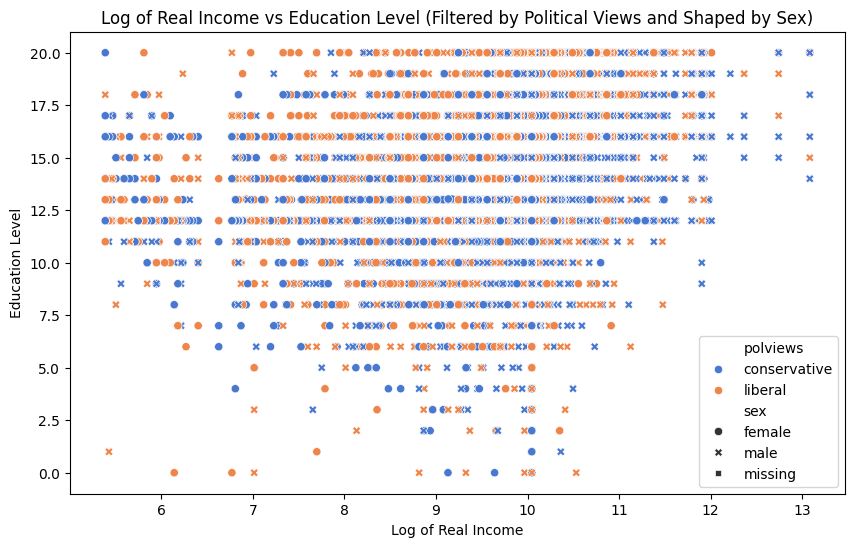

In [729]:
# Filter the dataset to include only the specified political views
gss_filtered = gss[gss['polviews'].isin(['liberal', 'conservative'])]

# Apply log transformation to 'real_income'
gss_filtered['log_real_income'] = np.log1p(gss_filtered['real_income'])  # Log-transform real income

# Create the scatter plot with the transformed variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gss_filtered, x='log_real_income', y='educ', hue='polviews', style='sex', palette='muted')
plt.title('Log of Real Income vs Education Level (Filtered by Political Views and Shaped by Sex)')
plt.xlabel('Log of Real Income')
plt.ylabel('Education Level')
plt.show()

<ipython-input-730-110240d5a3b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gss, x='health', y='stress', palette='pastel')


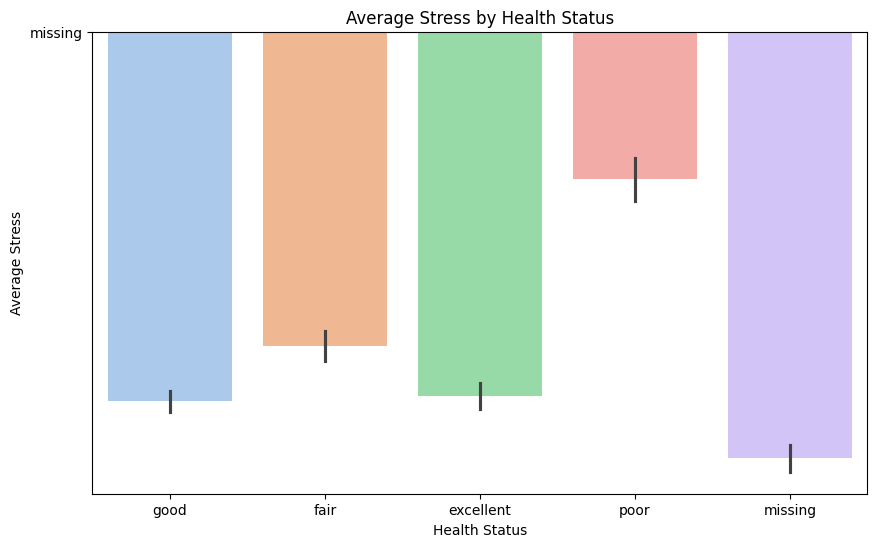

In [730]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gss, x='health', y='stress', palette='pastel')
plt.title('Average Stress by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Stress')
plt.show()

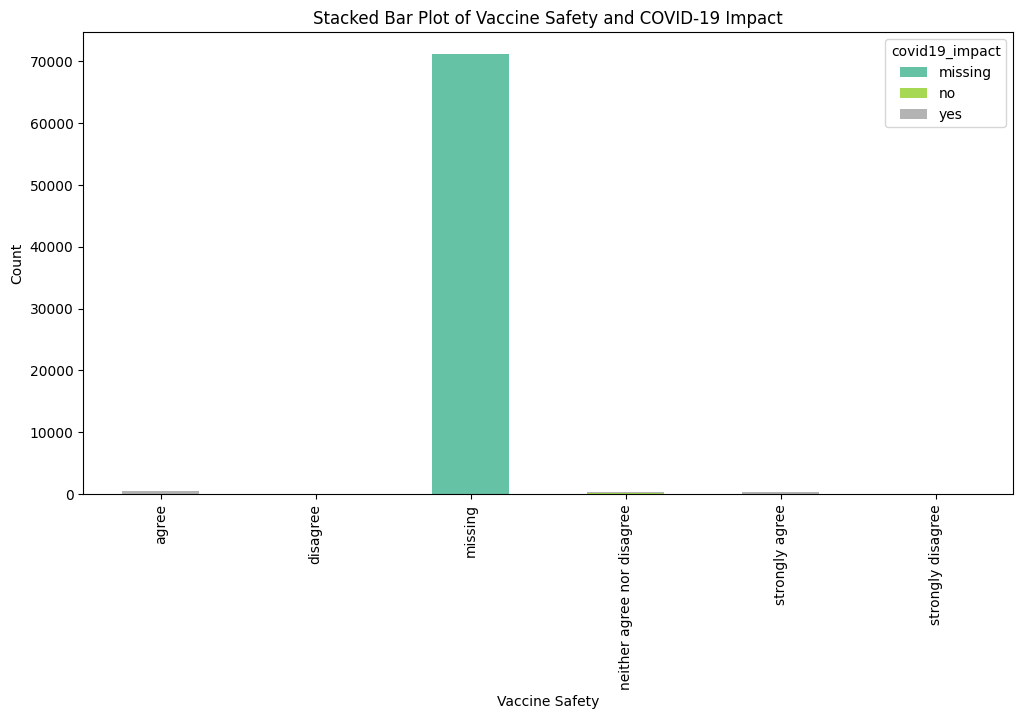

In [731]:
vaccine_impact = gss.groupby(['vaccine_safety', 'covid19_impact']).size().unstack().fillna(0)
vaccine_impact.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stacked Bar Plot of Vaccine Safety and COVID-19 Impact')
plt.xlabel('Vaccine Safety')
plt.ylabel('Count')
plt.show()

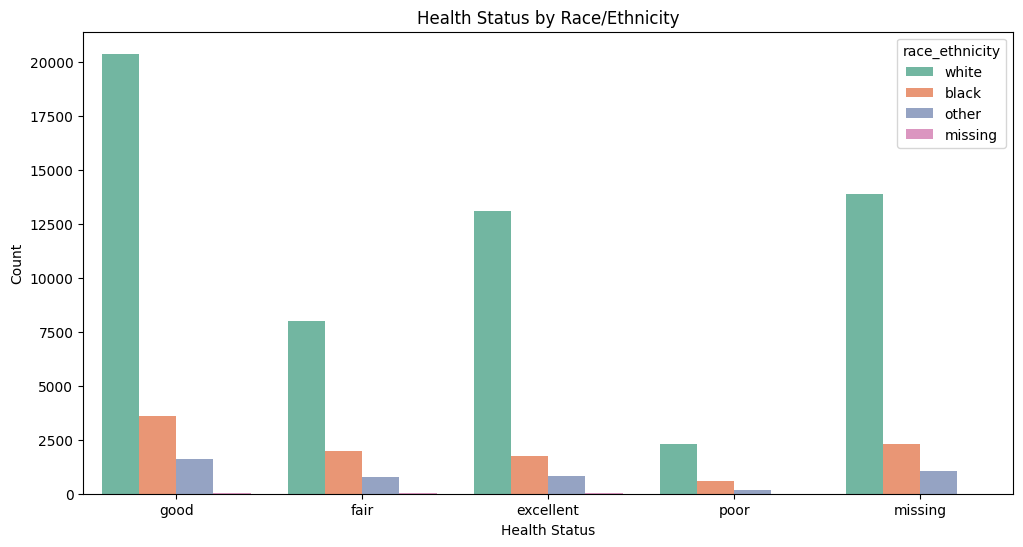

In [732]:
plt.figure(figsize=(12, 6))
sns.countplot(data=gss, x='health', hue='race_ethnicity', palette='Set2')
plt.title('Health Status by Race/Ethnicity')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()


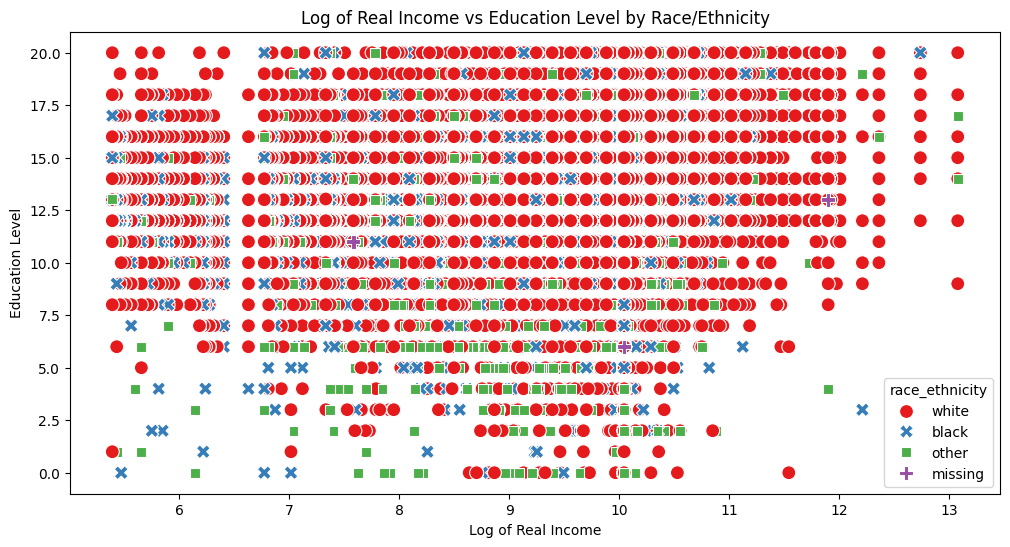

In [733]:
# Apply log transformation to 'real_income'
gss['log_real_income'] = np.log1p(gss['real_income'])  # Log-transform real income

# Create the scatter plot with the transformed variable and increased dot size
plt.figure(figsize=(12, 6))
sns.scatterplot(data=gss, x='log_real_income', y='educ', hue='race_ethnicity', style='race_ethnicity',
                palette='Set1', s=100)  # 's' controls the size of the dots (default is 40)

plt.title('Log of Real Income vs Education Level by Race/Ethnicity')
plt.xlabel('Log of Real Income')
plt.ylabel('Education Level')
plt.show()

In [734]:
desc_stats = gss[['educ', 'real_income', 'household_income', 'polviews', 'happy', 'sex']].describe(include='all').transpose()
print("\nDescriptive Statistics Table:")
print(desc_stats)


Descriptive Statistics Table:
                    count unique                           top   freq  \
educ              72390.0    NaN                           NaN    NaN   
real_income       72390.0    NaN                           NaN    NaN   
household_income  72390.0    NaN                           NaN    NaN   
polviews            72390      8  moderate, middle of the road  23992   
happy               72390      4                  pretty happy  37813   
sex                 72390      3                        female  40301   

                          mean           std    min        25%           50%  \
educ                 13.034633      3.176586    0.0       12.0          12.0   
real_income       23064.143938  22310.918611  218.0    14170.0  23064.143938   
household_income  32537.399981  29244.588997  218.0  13501.875       27188.0   
polviews                   NaN           NaN    NaN        NaN           NaN   
happy                      NaN           NaN    NaN      

In [735]:
# 1. Income by Degree
income_by_degree = gss.groupby('degree')['real_income'].describe()
print("\nIncome by Degree:")
print(income_by_degree)


Income by Degree:
                            count          mean           std    min  \
degree                                                                 
associate/junior college   4355.0  22136.650595  19906.736141  218.0   
bachelor's                11248.0  29216.742083  30440.882372  218.0   
graduate                   5953.0  39168.304989  43067.469347  218.0   
high school               36446.0  20050.479071  15425.335368  218.0   
less than high school     14192.0  19478.491731  10855.255406  218.0   
missing                     196.0  21484.269788   8778.900987  444.0   

                                   25%           50%           75%  \
degree                                                               
associate/junior college  13475.000000  23064.143938  23463.750000   
bachelor's                18476.250000  23064.143938  29925.000000   
graduate                  23064.143938  23563.000000  42020.000000   
high school               12012.656250  23064.143938  

In [736]:
# 2. Happiness by Political Views (cross tab)
happiness_by_polviews = pd.crosstab(gss['polviews'], gss['happy'], normalize='index') * 100
print("\nHappiness by Political Views (percentages):")
print(happiness_by_polviews)


Happiness by Political Views (percentages):
happy                           missing  not too happy  pretty happy  \
polviews                                                               
conservative                   2.820212      11.782929     50.432646   
extremely conservative         3.233256      16.997691     40.923788   
extremely liberal              2.642960      19.702066     50.264296   
liberal                        2.846648      14.207005     56.683720   
missing                       31.399917      11.548801     36.124897   
moderate, middle of the road   2.921807      13.321107     56.027009   
slightly conservative          2.532305      11.265110     55.439767   
slightly liberal               2.721519      13.063291     58.012658   

happy                         very happy  
polviews                                  
conservative                   34.964213  
extremely conservative         38.845266  
extremely liberal              27.390678  
liberal            

In [737]:
# 3. Political Views by Gender (cross tab)
polviews_by_gender = pd.crosstab(gss['sex'], gss['polviews'], normalize='index') * 100
print("\nPolitical Views by Gender (percentages):")
print(polviews_by_gender)


Political Views by Gender (percentages):
polviews  conservative  extremely conservative  extremely liberal    liberal  \
sex                                                                            
female       11.977370                2.736905           2.781569  10.701968   
male         14.125778                3.299246           2.986522  10.326172   
missing      15.178571                6.250000           4.464286   7.142857   

polviews    missing  moderate, middle of the road  slightly conservative  \
sex                                                                        
female    14.155976                     34.688966              12.096474   
male      12.346374                     31.191169              14.738718   
missing   16.964286                     33.928571               7.142857   

polviews  slightly liberal  
sex                         
female           10.860773  
male             10.986021  
missing           8.928571  


In [738]:
# 4. Political Views by Age Group
gss['educ_group'] = pd.cut(gss['educ'], bins=[0, 11, 15, 20], labels=['High School or Less', 'Some College', 'Bachelor+'])
polviews_by_educ = pd.crosstab(gss['educ_group'], gss['polviews'], normalize='index') * 100
print("\nPolitical Views by Education Level (percentages):")
print(polviews_by_educ)


Political Views by Education Level (percentages):
polviews             conservative  extremely conservative  extremely liberal  \
educ_group                                                                     
High School or Less     11.005846                3.587986           2.768259   
Some College            13.038584                3.070310           2.279705   
Bachelor+               14.337389                2.334758           4.236545   

polviews               liberal    missing  moderate, middle of the road  \
educ_group                                                                
High School or Less   8.244306  21.238998                     33.595377   
Some College          8.983216  12.475693                     36.749053   
Bachelor+            15.740436   8.544338                     25.128795   

polviews             slightly conservative  slightly liberal  
educ_group                                                    
High School or Less              10.374253    

In [739]:
# 5. Happiness by Income Quartile
income_bins = pd.qcut(gss['real_income'], q=4, duplicates='drop')

# Get number of unique bins actually used
n_bins = income_bins.cat.categories.size

# Create matching labels dynamically
labels = ['Low', 'Medium', 'High', 'Very High'][:n_bins]

# Apply qcut again with correct number of labels
gss['income_group'] = pd.qcut(
    gss['real_income'],
    q=n_bins,
    labels=labels,
    duplicates='drop'
)

happiness_by_income = pd.crosstab(gss['income_group'], gss['happy'], normalize='index') * 100
print("\nHappiness by Income Level (percentages):")
print(happiness_by_income)



Happiness by Income Level (percentages):
happy          missing  not too happy  pretty happy  very happy
income_group                                                   
Low           6.530612      13.654917     54.594929   25.219542
Medium        6.534541      14.665351     49.968613   28.831495
High          7.029015       7.982564     53.500885   31.487536


Regressions, Classification, and Trees

In [695]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Select relevant features
vars = ['real_income', 'happy', 'marital', 'educ', 'sex', 'hours_worked', 'attend','age','job_satisfaction','mother_educ','father_educ']
gss_subset = gss[vars].copy()

# Drop rows with missing data
gss_subset = gss_subset.dropna()

# Define target variable
y = gss_subset['real_income']

# Create dummy variables
X = pd.get_dummies(
    gss_subset.drop(columns='real_income'),
    columns=['happy', 'marital', 'sex', 'attend', 'job_satisfaction'],
    drop_first=True
)

# Lasso regression with scaling
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.5))  # You can tune alpha
lasso.fit(X, y)

# Extract model
model = lasso.named_steps['lasso']

# Print results
print("Intercept:", model.intercept_)
print("R^2 Score:", lasso.score(X, y))
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")

Intercept: 23064.143937684712
R^2 Score: 0.12943912104606392
Coefficients:
educ: 4010.9546
hours_worked: 3893.0614
age: 3122.7673
mother_educ: 127.0760
father_educ: 988.6539
happy_not too happy: -1101.3919
happy_pretty happy: -1424.7309
happy_very happy: -857.5835
marital_married: 1158.0368
marital_missing: 2.6340
marital_never married: -943.2223
marital_separated: 140.6262
marital_widowed: 247.1535
sex_male: 2903.4442
sex_missing: 140.2221
attend_about once a month: 150.9054
attend_about once or twice a year: 118.4336
attend_every week: -192.9096
attend_less than once a year: 172.3073
attend_missing: 14.9411
attend_nearly every week: -48.0220
attend_never: 117.3149
attend_several times a week: -312.9406
attend_several times a year: 171.0135
job_satisfaction_missing: -684.1439
job_satisfaction_moderately satisfied: 396.4608
job_satisfaction_very dissatisfied: -59.1676
job_satisfaction_very satisfied: 1301.2085


In [698]:
# lasso

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Select relevant features
vars = ['hours_worked','real_income', 'happy', 'marital', 'pray','arrest','inj_drugs','age','mother_educ','father_educ',
        'educ','financial_satis','health_insurance','spouse_work_status','work_status','degree','joblose']
gss_subset = gss[vars].copy()

# Drop rows with missing data
gss_subset = gss_subset.dropna()

# Define target variable
y = gss_subset['hours_worked']

# Create dummy variables
X = pd.get_dummies(
    gss_subset.drop(columns='hours_worked'),
    columns=['happy', 'marital', 'pray','arrest','inj_drugs','health_insurance','financial_satis','spouse_work_status','work_status','degree','joblose'],
    drop_first=True
)

# Lasso regression with scaling
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.5))  # You can tune alpha
lasso.fit(X, y)

# Extract model
model = lasso.named_steps['lasso']

# Print results
print("Intercept:", model.intercept_)
print("R^2 Score:", lasso.score(X, y))
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")


Intercept: 41.183950914340706
R^2 Score: 0.37217260505055993
Coefficients:
real_income: 0.7730
age: -0.0000
mother_educ: 0.0000
father_educ: 0.0000
educ: 0.0000
happy_not too happy: -0.0000
happy_pretty happy: 0.0000
happy_very happy: -0.0000
marital_married: 0.0000
marital_missing: -0.0000
marital_never married: -0.0000
marital_separated: -0.0000
marital_widowed: -0.0000
pray_missing: -0.0000
pray_never: 0.0000
pray_once a day: -0.0000
pray_once a week: 0.0000
pray_several times a day: -0.0000
pray_several times a week: 0.0000
arrest_no: -0.0000
arrest_refused_(3): -0.0000
arrest_yes: 0.0000
inj_drugs_no: 0.0000
inj_drugs_yes: 0.0000
health_insurance_have no health insurance: -0.0000
health_insurance_missing: 0.0000
health_insurance_other: -0.0000
health_insurance_private insurance: -0.0000
health_insurance_public health insurance: -0.0000
financial_satis_more or less satisfied: 0.0000
financial_satis_not satisfied at all: -0.0000
financial_satis_pretty well satisfied: -0.0000
spouse_

Logistic Regression

In [686]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Recode 'happy' to binary: 1 = happy, 0 = not too happy
gss['happy_binary'] = gss['happy'].map({
    'very happy': 1,
    'pretty happy': 1,
    'not too happy': 0
})

# Choose predictors
features = ['marital', 'educ', 'sex', 'hours_worked', 'attend','age']

# Subset data and drop missing
df = gss[['happy_binary'] + features].dropna()

# Define X and y
X = pd.get_dummies(df[features], drop_first=True)
y = df['happy_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Intercept:", log_reg.intercept_)

Accuracy: 0.8595946145879568
Confusion Matrix:
 [[    2  1895]
 [    3 11618]]
Intercept: [0.51225248]


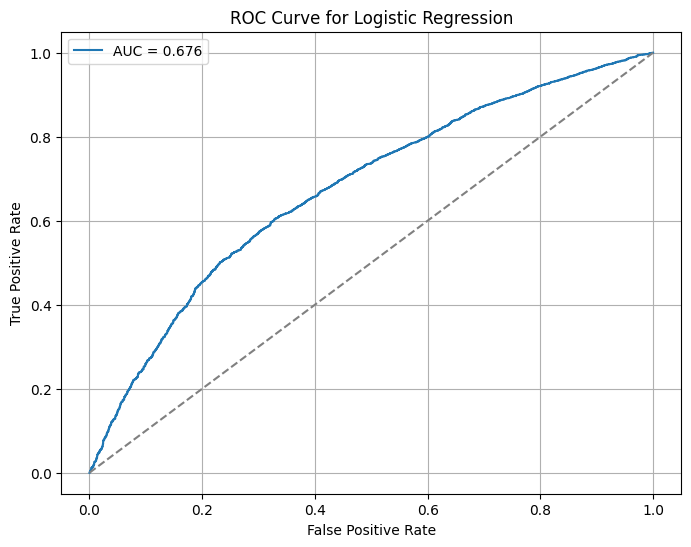

                             Variable  Coefficient
3                     marital_married     0.982361
6                   marital_separated    -0.444425
16                       attend_never    -0.405471
13       attend_less than once a year    -0.275425
12                  attend_every week     0.206652
17        attend_several times a week     0.200314
14                     attend_missing    -0.157045
11  attend_about once or twice a year    -0.141167
15           attend_nearly every week     0.116900
18        attend_several times a year    -0.109801
7                     marital_widowed     0.102232
5               marital_never married     0.074637
0                                educ     0.074463
9                         sex_missing    -0.063505
8                            sex_male    -0.046393
10          attend_about once a month     0.019211
4                     marital_missing    -0.006550
1                        hours_worked     0.005217
2                              

In [687]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class (1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()


# Get feature names (X_test must be a DataFrame)
feature_names = X_test.columns

# Get coefficients from the trained logistic regression model
coefficients = log_reg.coef_[0]

# Create a nicely formatted DataFrame
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display the result
print(coef_df)



In [688]:
# Recode 'happy' to binary: 1 = happy, 0 = not too happy for binary dependent variable
gss['happy_binary'] = gss['happy'].map({
    'very happy': 1,
    'pretty happy': 1,
    'not too happy': 0
})

# Choose predictors
features = ['marital', 'educ', 'sex', 'polviews', 'attend','number_of_children','health','smokeday','age']

# Subset data and drop missing
df = gss[['happy_binary'] + features].dropna()

# Define X and y
X = pd.get_dummies(df[features], drop_first=True)
y = df['happy_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Intercept:", log_reg.intercept_)

Accuracy: 0.8595946145879568
Confusion Matrix:
 [[   84  1813]
 [   85 11536]]
Intercept: [0.82139887]


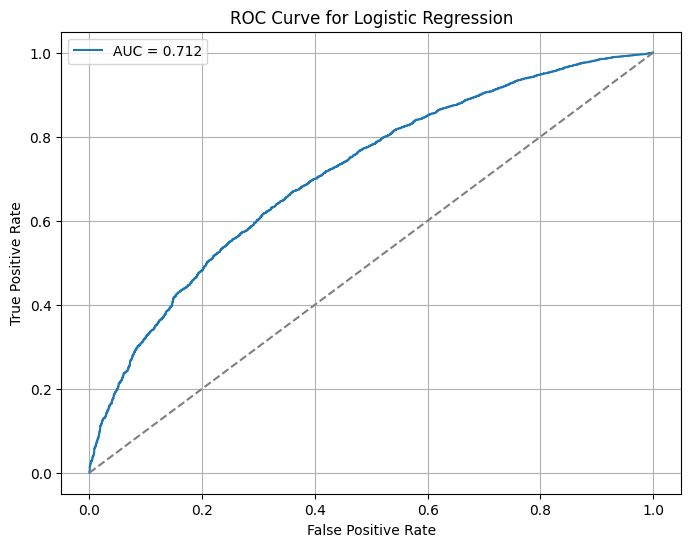

                                            Variable  Coefficient
29                                       health_poor    -1.830503
26                                       health_fair    -1.201009
3                                    marital_married     0.961718
31                                  smokeday_missing     0.762619
27                                       health_good    -0.414543
6                                  marital_separated    -0.392927
28                                    health_missing    -0.391697
23                                      attend_never    -0.375473
10                   polviews_extremely conservative    -0.314498
11                        polviews_extremely liberal    -0.307159
20                      attend_less than once a year    -0.280012
24                       attend_several times a week     0.185730
21                                    attend_missing    -0.179613
13                                  polviews_missing    -0.157714
18        

In [689]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class (1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

# Get feature names (X_test must be a DataFrame)
feature_names = X_test.columns

# Get coefficients from the trained logistic regression model
coefficients = log_reg.coef_[0]

# Create a nicely formatted DataFrame
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display the result
print(coef_df)


In [692]:
# Choose predictors
features = ['polviews', 'educ', 'sex', 'gunlaw', 'attend','pray','vaccine_safety','number_partners']

# Subset data and drop missing
df = gss[['happy_binary'] + features].dropna()

# Define X and y
X = pd.get_dummies(df[features], drop_first=True)
y = df['happy_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Intercept:", log_reg.intercept_)

Accuracy: 0.8595946145879568
Confusion Matrix:
 [[    1  1896]
 [    2 11619]]
Intercept: [0.20669144]


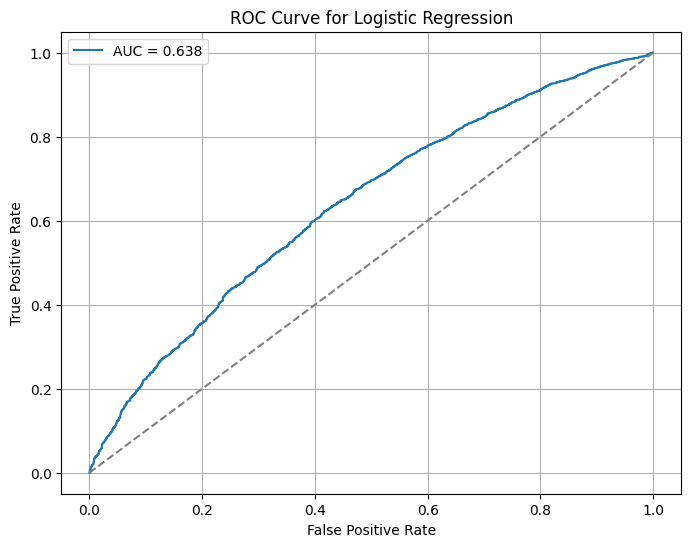

                                     Variable  Coefficient
32                  number_partners_1 partner     0.524691
28                     vaccine_safety_missing     0.444541
2                  polviews_extremely liberal    -0.428979
18                               attend_never    -0.400319
19                attend_several times a week     0.382949
29  vaccine_safety_neither agree nor disagree    -0.356865
1             polviews_extremely conservative    -0.333467
14                          attend_every week     0.317128
25                   pray_several times a day    -0.300755
22                                 pray_never    -0.298527
15               attend_less than once a year    -0.296420
39                    number_partners_missing     0.296102
37                 number_partners_4 partners    -0.274423
4                            polviews_missing    -0.255431
10                             gunlaw_missing     0.216927
41                number_partners_no partners    -0.2152

In [693]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class (1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

# Get feature names (X_test must be a DataFrame)
feature_names = X_test.columns

# Get coefficients from the trained logistic regression model
coefficients = log_reg.coef_[0]

# Create a nicely formatted DataFrame
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display the result
print(coef_df)



Classification

In [591]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Select features and target
features = ['household_income', 'job_satisfaction', 'educ', 'age', 'marital', 'sex', 'race_ethnicity','health','stress','relig','physact','number_of_children']
gss_subset = gss[features + ['happy']].dropna()

# 2. Encode categorical variables
X = pd.get_dummies(gss_subset.drop(columns='happy'), drop_first=True)
y = gss_subset['happy']  # Categorical target

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 6. Evaluate
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5249343832020997
[[ 510   54  318   73]
 [  59  370 1262  160]
 [ 137  708 5391 1333]
 [  77  223 2474 1329]]
               precision    recall  f1-score   support

      missing       0.65      0.53      0.59       955
not too happy       0.27      0.20      0.23      1851
 pretty happy       0.57      0.71      0.63      7569
   very happy       0.46      0.32      0.38      4103

     accuracy                           0.52     14478
    macro avg       0.49      0.44      0.46     14478
 weighted avg       0.51      0.52      0.51     14478



Tree/Random Forest

In [595]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# 1. Select features and target
features = ['household_income', 'job_satisfaction', 'educ', 'age', 'marital', 'sex', 'race_ethnicity','health','stress',
            'relig','physact','number_of_children','class','polviews','work_status','smokeday','gunlaw']
gss_subset = gss[features + ['happy']].dropna()

# 2. Encode categorical variables
X = pd.get_dummies(gss_subset.drop(columns='happy'), drop_first=True)
y = gss_subset['happy']  # Categorical target

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5946953999171156
[[ 860    5   77   13]
 [  19  203 1508  121]
 [  54  179 6244 1092]
 [  21   49 2730 1303]]
               precision    recall  f1-score   support

      missing       0.90      0.90      0.90       955
not too happy       0.47      0.11      0.18      1851
 pretty happy       0.59      0.82      0.69      7569
   very happy       0.52      0.32      0.39      4103

     accuracy                           0.59     14478
    macro avg       0.62      0.54      0.54     14478
 weighted avg       0.57      0.59      0.55     14478



Clustering with K-means

NEED TO KEEP WORKING ON CLUSTERING

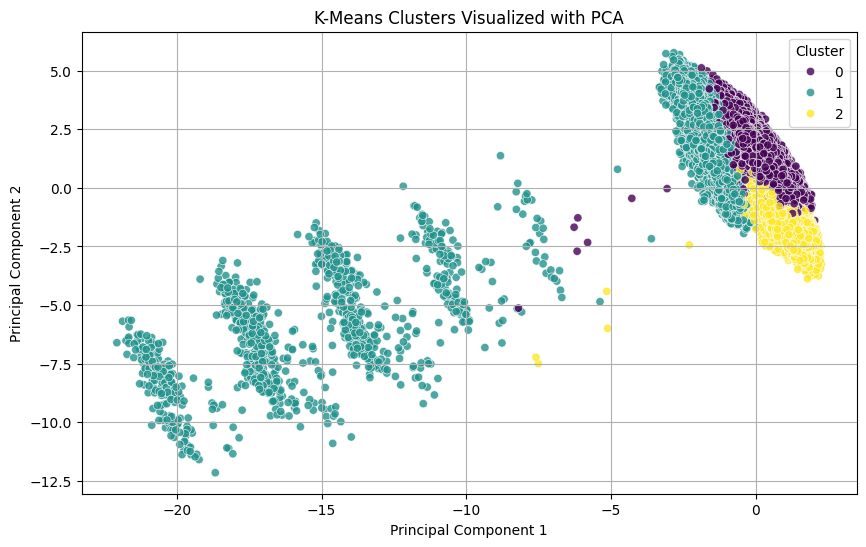

In [742]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

vars_of_interest = [
    'marital', 'number_of_children','educ','work_status', 'sei','race_ethnicity', 'sex', 'sexornt','happy',
    'financial_satis','health', 'stress', 'physact', 'health_insurance', 'number_partners',
    'inj_drugs', 'smokeday', 'spouse_work_status', 'polviews', 'relig', 'area_fear', 'gunlaw'
]

# Subset the dataframe
df = gss[vars_of_interest].copy()

numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna('missing')

# STEP 3: One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# STEP 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# STEP 5: K-Means clustering (you can tune k)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# STEP 6: PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# STEP 7: Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.8)
plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()